# Pyber Ride Sharing




## Analysis

#### Observed Trend 1 
There is an inverse crrelation between the population size and the fare price. The less populated the area, the higher the fare price. 

#### Observed Trend 2
There is a direct correlation between city population size and the number of drivers. Urban areas have more drivers than suburban and rural areas.

#### Observed Trend 3
Ride sharing is most prevelant and cost-effective in urban areas, where the supply of drivers and riders is the highest.



In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [16]:

# takes in all of the ride sharing data and reads it into pandas
city_data = "Resources/city_data.csv"
ride_data = "Resources/ride_data.csv"

# creates city data and ride data dataframes
city_data_df = pd.read_csv(city_data)
ride_data_df = pd.read_csv(ride_data)


ride_data_df.head(5)

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [17]:
# merges the first two datasets on "city" so that no data is lost 

combined_data_df = pd.merge(ride_data_df, city_data_df, how='outer', on='city')
combined_data_df.head(5)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


# Bubble Plot of Ride Sharing Data

In [18]:
# groups data by city
group_data = combined_data_df.groupby(['city'])
group_data.count().head(5)

,date,fare,ride_id,driver_count,type
city,,,,,
Amandaburgh,18,18,18,18,18
Barajasview,22,22,22,22,22
Barronchester,16,16,16,16,16
Bethanyland,18,18,18,18,18
Bradshawfurt,10,10,10,10,10


In [19]:

# finds average fare
average_fare = group_data.mean()['fare']

# finds total number of rides
ride_total = group_data['ride_id'].count()

# finds driver count
driver_count = group_data.mean()['driver_count']

# city type data
city_type = city_data_df.set_index('city')['type']

# creates new dataframe for scatter plot data
city_results = pd.DataFrame({
    "Average Fare": average_fare,
    "Total Number of Rides": ride_total,
    "Total Number of Drivers": driver_count,
    "City Type": city_type
})


city_results.head(5)

,Average Fare,City Type,Total Number of Drivers,Total Number of Rides
Amandaburgh,24.641667,Urban,12.0,18
Barajasview,25.332273,Urban,26.0,22
Barronchester,36.422500,Suburban,11.0,16
Bethanyland,32.956111,Suburban,22.0,18
Bradshawfurt,40.064000,Rural,7.0,10


In [20]:
# splits up data into groups based on City Type

# urban
urban = city_results.loc[city_results["City Type"] == "Urban"]

# suburban
suburban = city_results.loc[city_results["City Type"] == "Suburban"]

# rural
rural = city_results.loc[city_results["City Type"] == "Rural"]



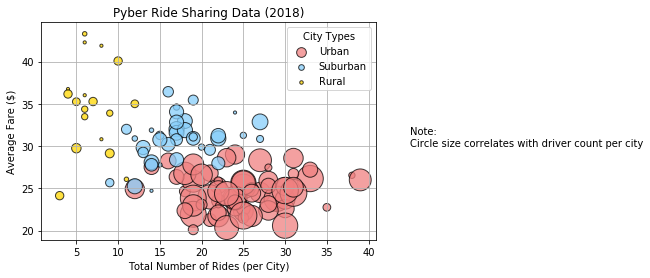

In [21]:
# creates scatter plot for each city type

# urban
plt.scatter(urban["Total Number of Rides"], urban["Average Fare"], marker="o", facecolor = "lightcoral", edgecolors="black", s = urban["Total Number of Drivers"]*10, label = "Urban", alpha = 0.75, linewidth = 1)

# suburban
plt.scatter(suburban["Total Number of Rides"], suburban["Average Fare"], marker="o", facecolor = "lightskyblue", edgecolors ="black", s = suburban["Total Number of Drivers"]*10, label = "Suburban", alpha = 0.75, linewidth = 1)

# rural
plt.scatter(rural["Total Number of Rides"], rural["Average Fare"], marker="o", facecolor = "gold", edgecolors = "black", s = rural["Total Number of Drivers"]*10, label = "Rural", alpha = 0.75, linewidth = 1)


# adds title, x axis label and y axis label
plt.title("Pyber Ride Sharing Data (2018)")
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Average Fare ($)")

# adds note
plt.text(45, 30,"Note: \nCircle size correlates with driver count per city")


# adds legend
plt.legend(loc=1,  markerscale = 0.5 , title='City Types')

# displays grid
plt.grid(True)

# Saves an image of the scatter chart and prints the final product to the screen
plt.savefig("Images/Pyber_Pie.png")

plt.show()

# Total Fares by City Type

In [22]:
# finds total fares by city type

pie_fare = combined_data_df.groupby(["type"])["fare"].sum()
pie_fare

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [23]:
# sets labels, colors and explode for all pie charts
pies = ["Rural", "Suburban", "Urban"]
colors = ["gold","lightskyblue","lightcoral"]
explode = (0,0,0.1)

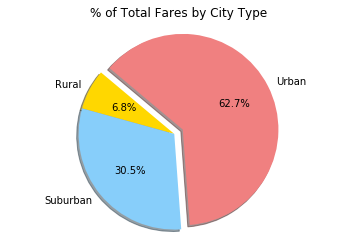

In [24]:

# tells matplotlib to create a pie chart based upon the above data
plt.pie(pie_fare, explode=explode, labels=pies, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Creates axes which are equal so the pie chart is a perfect circle
plt.axis("equal")

plt.title("% of Total Fares by City Type")

# Saves an image of the chart and prints the final product to the screen
plt.savefig("Images/Fares_Pie.png")

plt.show()

# Total Rides by City Type

In [25]:
# finds riders by city type

pie_riders =  city_results.groupby(["City Type"])["Total Number of Rides"].sum()
pie_riders

City Type
Rural        125
Suburban     625
Urban       1625
Name: Total Number of Rides, dtype: int64

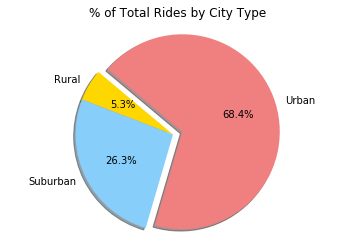

In [26]:
# tells matplotlib to create a pie chart based upon the above data
plt.pie(pie_riders, explode=explode, labels=pies, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Creates axes which are equal so the pie chart is a perfect circle
plt.axis("equal")

plt.title("% of Total Rides by City Type")

# Saves an image of the chart and prints the final product to the screen
plt.savefig("Images/Rides_Pie.png")

plt.show()

# Total Drivers by City Type

In [27]:
# finds total drivers by city type

pie_drivers = city_results.groupby(["City Type"])["Total Number of Drivers"].sum()
pie_drivers

City Type
Rural         78.0
Suburban     490.0
Urban       2405.0
Name: Total Number of Drivers, dtype: float64

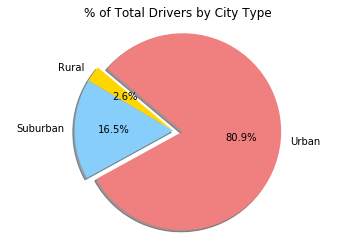

In [28]:
# tell matplotlib to create a pie chart based upon the above data
plt.pie(pie_drivers, explode=explode, labels=pies, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Creates axes which are equal so the pie chart is a perfect circle
plt.axis("equal")

plt.title("% of Total Drivers by City Type")

#Saves an image of our chart and prints the final product to the screen
plt.savefig("Images/Drivers_Pie.png")

plt.show()